# Drug Review NLP

### Author : Avash Monajemi

# (0) Motivation

Over the course of the last year in my journey of searching for internships and learning more about the data science field, I began to realize the demand in data science for people that know how to extract insights from text data. I am always looking to strengthen my skills in the best way possible as a prosepctive data scientist, and I believe keeping up with the most important trends in data science and AI is important and a way to set yourself apart from the rest of the crowd. The importance of NLP tasks made immediate sense to me in that often times in industry and tech companies for example, we need to be able to capture meaning from the voice of the customer directly and understand the sentiments to see how we can improve customer experience. Furthermore, applications of email spam filtering and disease prediction based off of patient speech also made me really excited to try to see how I can work with this kind of data myself. Since I have not learned these concepts in actual classes at university, I decided I wanted to take the step to learn these msyelf so that I get an excellent starting point.

After learning online about NLP and its booming usage in the healthcare industry as a means to improve healthcare costs and experiences, I decided to choose a data set that pertains in some way to this topic. I have chosen a data set of pharmacudical drug reviews from Drugs.com that I will be working with.

## (1) Background Information

### 1.1 Introduction to Drug Reviews

This dataset is regarding 215063 observations of drug reviews and other variables that provide additional information to their review.

##### How was this data created?
- The answer is through web scraping. Web scraping is the act of gathering specific data and copying it from the web into a database or spreadsheet for purposes of data analysis. To explain further, all of the information and variables in this dataset are located somewhere on the web page of reviews and is compiled into distinct columns of information. Members of the UCI machine learning repository are acredited for creating this dataset by looking through pharmaceutical review sites and web scraping relevant information.

##### What is a drug review anyway?
-  A drug review notes a patient's critique of a drug they consumed. A patient decides to use a drug to stabilize symptoms (physical or mental characteristics) due to their condition/disease, and they make a note of reactions to the drug & effectiveness in curing symptoms related to their condition. Thus, drug reviews could potentially be of neutral language because some patients may have positive feelings regarding their drugs effectiveness to cure symptoms of their current condition, but may be unhappy with the side effects. For example, the government of South Australia notes the importance of drug effects when they note, "sometimes unwanted side-effects may be produced and the potential benefits of the medicine need to be weighed up against the risk of side-effects". For our data, we expect that most drug reviews will not be completely positive as they often have side effects.

-  **Example** : "I took this Bumex drug and it has been helping my high blood pressure condition for two weeks now! However, I am very upset with the side-effects as I have experienced slow muscle movements and intense fatigue."



### 1.2 Additional Variable Information / Importance

We have already explained the meaning and context behind a drug review which is 1 out of the 6 variables in our data. Now we will explain the supporting variables.


##### Drug Name
-  The drug name is simply the name of the drug that the patient consumed to treat their condition/disease. These drugs can be of different shapes and states such as liquids or solid tablets. More importantly, some patients used a combination drug which consists of two different drugs used together to treat a condition, and this is noted by a " / " in the variable.

-  **Example of drug forms** The drug Buprenorphine used to treat opiod addictions is given in the form of a tablet or pill.

-  **Example of combination drugs** In our data, there are cases where a patient used the combination drug Buprenorphine / naloxone instead of Buprenorphine alone. In fact, the condition of treating opiod addictions, it is common for patients to consume this combination drug after they had consumed Buprenorphine alone.
##### Condition
-  Firstly, we must note that the term "Condition" in this variable comprises of many different types of disorders, diseases, illnesses, infections, syndromes, and the like. One key distinction between some conditions is curable vs. non-curable. Furthermore, there are key differences in these different types of conditions and understanding them could be very important to analyzing why patient's satisfaction level may be lower for one classification of condition than another.


-  **Example** A *syndrome* is a collection (1 or more) distinct symptoms that characterize a *disease*.


##### Rating
-  This variable is seen throughout many different discussions of topics or establishments. The rating of the drug essentially describes the satisfaction level out of 10 in this data. The Rating ranges from 1 to 10 and larger values represent higher satisfaction. There could be many factors or attributes that are correlated with rating and we will explore them further.


##### Date
-  This variable is very self-explanatory. The date column in this data shows the day, month, and year in which the review was written online. Why might this be important? There are relationships with seasons and health related measures and we can examine what these are.


##### Useful Count
-  The number of useful marks a drug review has indicates the number of people that found the review useful. Basically, if there are more useful marks we can regard that review as very useful, and those that have little to none may not be useful. However, it is very important to attach meaning to what "useful" might indicate when someone reads a review. We will explore this deeper later but for now a preliminary thought can be that patients regard a review as useful if they have discovered new or specific-patient related insight they did not know before


## (2) Exploratory Data Analysis / Text Structuring

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import sys
!{sys.executable} -m pip install pandasql
from pandasql import sqldf
from pandasql import *
import calendar
pysqldf = lambda q: sqldf(q, globals())
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

  Running setup.py bdist_wheel for pandasql: started
  Running setup.py bdist_wheel for pandasql: finished with status 'done'
  Stored in directory: C:\Users\javacash\AppData\Local\pip\Cache\wheels\53\6c\18\b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javacash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [2]:
Reviews1=pd.read_csv('drugsComTest_raw.csv')
Reviews1.shape

(53766, 7)

In [3]:
Reviews=Reviews1[['drugName', 'condition','review','rating','date','usefulCount']]

In [4]:
Reviews.head(10)

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [5]:
Reviews['word_count'] = Reviews['review'].apply(lambda x: len(str(x).split(" ")))
pd.DataFrame(Reviews.word_count.describe())

,word_count
count,53766.000000
mean,85.587751
std,44.767313
min,1.000000
25%,49.000000
50%,85.000000
75%,127.000000
max,1222.000000


The first point we should note in analyzing word count distributions is that a review having 1222 words is a very large text that is much larger, over 10 times larger, than the 75th percentile of word count which is 127. We can neglect this outlier for visualizing distributions. Furthermore, a review that is as large as 1222 words may not differ with respect to other measures as one that is already high enough at the 99.9th percentile.

In [6]:
Reviews1=Reviews[Reviews.word_count <= Reviews.word_count.quantile(.9995)]
import matplotlib.pyplot as plt
plt.subplot(1, 3, 1)
Reviews1['word_count'].hist(bins=40)
plt.title("Distribution of Word Count in Review")
plt.subplot(1,3,3)
import seaborn as sns
ax = sns.countplot(x="rating", data=Reviews)
ax.set_title("Drug Ratings (1-10 Score) Countplot")
ax.set(xlabel='Rating',ylabel='Respective Counts')

[Text(0, 0.5, 'Respective Counts'), Text(0.5, 0, 'Rating')]

The plot on the left shows the distribution of # words in the review. We notice the histogram is rather unimodal and has a clear peak at around 130 words representing the most common amount of words used in a review. It is rather difficult to tell if the distribution is skewed rightly or leftly, however since the median is ever so slightly less than the mean, the distribution can be considered as right skewed. The spread is from 0 to about 300 indiciated by the plot.

The plot on the right indicates the distribution of drug ratings. We see that most commonly, people are rating the drug very highly and probably effectively in the the range of 8 - 10 ratings, with 10/10 being the most common. The 4th most likely rating a drug user would give is the lowest rating : 1. Clearly there is a large seperation of ratings here.

Below is also a boxlpot of the word counts 

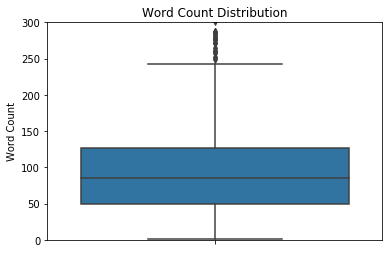

In [7]:
ax=sns.boxplot(y=Reviews.word_count, data=Reviews)
plt.ylabel("Word Count")
plt.title("Word Count Distribution")
ax.set_ylim([0, 300])  
plt.show()

We are curious whether there is a relationship between the rating and the average number of useful counts, as well as the rating and the average word counts used in their detailed review on the drug. 

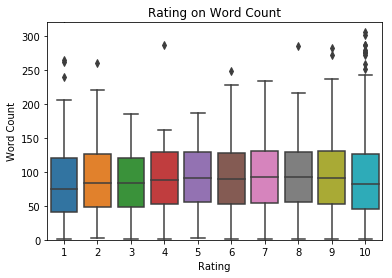

In [8]:
ax=sns.boxplot(x=Reviews.rating,y=Reviews.word_count, data=Reviews)
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.title("Rating on Word Count")
ax.set_ylim([0, 320])  
plt.show()

From here we notice that there is not a strong relationship between rating and word count. It does make sense that ratings of middle rankings of 5 or 6 have more lengthy reviews as seen above, but it is not significantly more than other ratings.

Text(0.5, 1.0, 'Word Count by Rating')

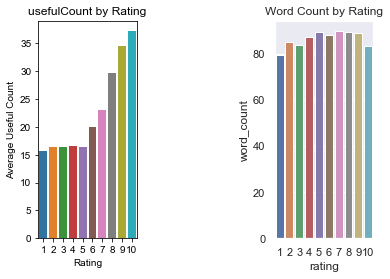

In [9]:
RatingUseful=Reviews.groupby(['rating'])['usefulCount'].mean().reset_index()
plt.subplot(1,3,1)
ax = sns.barplot(x="rating", y="usefulCount", data=RatingUseful)
ax.set_title("usefulCount by Rating")
ax.set(xlabel='Rating',ylabel='Average Useful Count')
import seaborn as sns; sns.set(color_codes=True)
WordCounts=Reviews.groupby(['rating'])['word_count'].mean().reset_index()
plt.subplot(1,3,3)
ax = sns.barplot(x="rating", y='word_count', data=WordCounts)
ax.set_title("Word Count by Rating")


From above there is a clear relationship between the rating of the drug and the useful count. It seems that viewers tend to mark positively rated drugs as being useful more often than for drugs with a low rating. Furthermore, extreme ratings of 1 and 10 for the drug correspond to on average having shorter reviews by about 10 word in length compared to those with more neutral scores. This could be explained by the fact that reviews that are a mix of positive and negative feedback require longer arguments of explaining two sentiments than for those that are purely positive or negative.

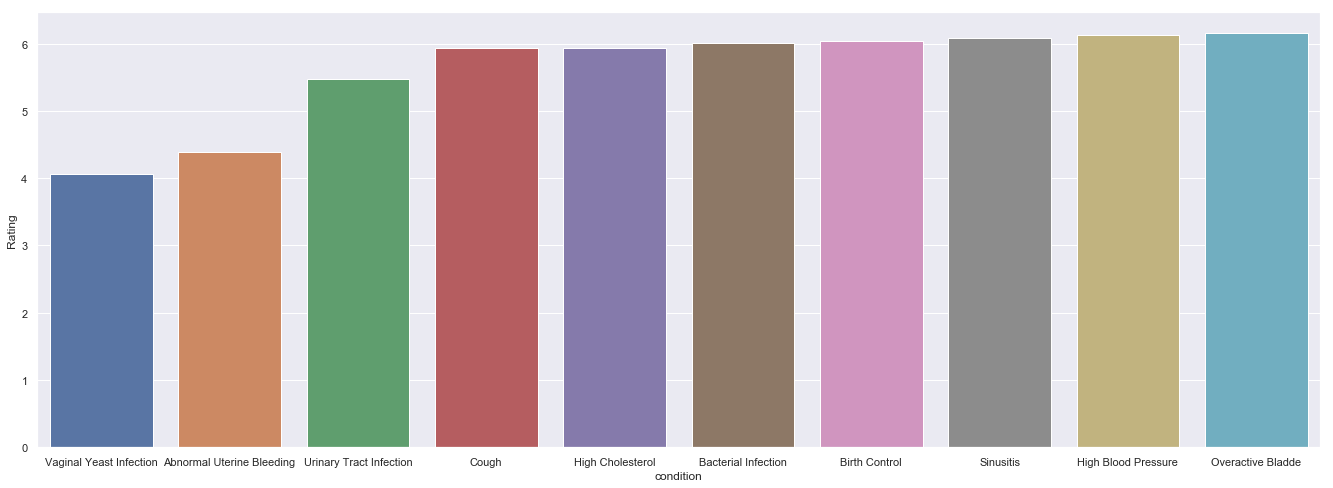

In [10]:
conditions = pd.DataFrame(pysqldf("""SELECT condition, AVG(rating) AS Rating FROM Reviews GROUP BY condition HAVING COUNT(*)>=200 ORDER BY 2 LIMIT 10"""))
plt.figure(figsize=(23, 8))
sns.barplot(x="condition", y="Rating", data=conditions)

Above are the drugs that have the lowest ratings. It is interesting to note that many of the drugs only pertain to women such Vaginal Yeast Infection, Abornal Uterine Bleeding, and Birth Control.

Now we need to properly define the concept of sentiment analysis so that we can obtain sentiment scores per review

Sentiment analysis is a field that is part of Natural Language Processing (NLP) that uses algorithms to identify opinions in text data. Structuring text data and gaining actionable insight from it is very import in product analytics and to provide advanced product reccomendations in industry. Relevant information from sentiment analysis could be

- *Polarity* : Expressing a positive or negative opinion (scored on [-1,1])
- *Subject*  : The main topic that is being discussed

##### What are Opinions?

Because textual information can be easily seperated into facts vs opinions, we should properly define their differences first.

-  Facts are **objective** comments regarding a topic
-  Opinions are **subjective** in that they include a user's feeling and sentiments (usually in the form of adjectives) of a topic.

-  Example : **Fact** : This reccomended amount of duration to intake this drug is 3 weeks
-  Example : **Opinion** : The duration for taking this drug to cure my insomnia is too long!

##### Methods for expressing Opinions

There are a number of ways to express opinions and some may not seem obvious at first hand and sentiment analysis may have a harder time detecting these.

-  One can blunty state that Drug A is horrible, however they may also use comparison and say Drug B is better than Drug A.

-  Some opinions express facts, but at advanced level may be seen as opinions.
-  **Example** : "This drug made me feel so much better" vs "I only had to use the drug for one day". Both can be seen as positive, but the latter we expect could be harder to classify as positive.


##### How Sentiment Analysis Works

-  There are rule-based methods that analyze words in the text and identify the negative words and positive words. The count of these is then compared to see if  the overall sentiment is positive, negative, or neutral. 

-  There are automatic approaches that rely on machine learning techniques and it is modeled as a classification problem where the algorithm reads the text data and returns if it is positive, negative, or neutral.

-  In our approach, we will use the Textblob NLTK package to analyze the sentiments. It is based on a **Naive Bayes Classifier** (this is useful for text classification purposes) that will be used to make the conclusions, and although we could train our own we will make it simple and use the one by default. 

##### Limitations

-  Because sentiment analysis is a hard process to classify a given text, it will not be correct 100% of the time. However, for general purpose usage, getting it incorrect around 20% of the time is something we must accept and it can still be valid to use it for exhibiting certain trends.

- For example, double negations in a text could be very misleading and is often hard to detect as negative or positive by the algorithm

In [11]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\javacash\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javacash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

Lets simply demonstrate how sentiment analysis works on a given text of a sample drug reviews and see what the negative , positive, nuetral , and compound scores turn out to be.

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
message_text = '''I had hoped for a cure to my long lasting sore throat problem, and finally this drug worked! After only two days
I felt so much better. I would highy reccomend this drug. It is great'''
print(message_text)
scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('\n'+ '{0}: {1}, '.format(key, scores[key]) + '\n')

I had hoped for a cure to my long lasting sore throat problem, and finally this drug worked! After only two days
I felt so much better. I would highy reccomend this drug. It is great

compound: 0.7158, 


neg: 0.123, 


neu: 0.637, 


pos: 0.24, 



So we see that when we inputted an obiously positively written review, our compound score which is the overall affect of the entire text that is normalized between -1 and 1 has a pretty high sentiment score of 0.7158. It makes sense and relatively we can agree on this because our text did have a high amount of positive words. If we remove adjectives like good and great, our compound score would decrease. 

We will revisit the sentiment scores for our entire corpus after we have structured our text data. We will work with the following methods to pre-process our text

-  Punctuation / non-language text removal
-  Word Removal
-  n-grams
-  Stemming / Lemmatizing
-  tokenization



In [13]:
Reviews["review"] = Reviews["review"].str.replace("[^a-zA-Z#]", " ") #Special Character Removals
Reviews['review'] = Reviews['review'].apply(lambda y: " ".join(y.lower() for y in y.split()))  #Lower Case
Reviews['review'] = Reviews['review'].str.replace('[^\w\s]','')  #punctuation correction
freq = pd.Series(' '.join(Reviews["review"]).split()).value_counts()[:10]
Reviews["review"]= Reviews["review"].apply(lambda x: " ".join(x for x in x.split() if x not in freq.index)) #Removing the 10 most common words in the corpus
Reviews["review"] = Reviews["review"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
# ^ Removing words of length less than 3, these are not considered valuable for analyzing text

In [14]:
documents=Reviews['review']
documents[0:5]

0    tried antidepressants over years citalopram fl...
1    crohn disease done very well asacol complaints...
2                             quick reduction symptoms
3    contrave combines drugs that were used alcohol...
4    been this birth control cycle after reading so...
Name: review, dtype: object

Now that we took initial steps to manage our text data, the review looks much more readable and also simple to look at.

Next we proceed by removing stopwords from the text - words that are too common in english text and don't provide any insight into the data, and as well as a list of domain-specific stopwords that ought to be removed.

In [15]:
extra_stopwords=['experience','work','review','reviews','back','works','worked','drug', 'doctor','feel','life','saved','save','felt','started','tried','start','starts','try','effect','effects','use','affect','medication','medications','medicine','hurt','problem','treatment','symptom','symptoms','weeks','months','days','took', 'take', 'month', 'day', 'week','year','years','like','use','well','know','prescribed','prescribe','give','time','gave','pill','pain']
stop_words=list(gensim.parsing.preprocessing.STOPWORDS)
stop_words.extend(extra_stopwords)
print ('The total amount of stop words are ' + str(len(stop_words)))

The total amount of stop words are 389


In [16]:
np.array(stop_words[0:15]) # These are just the first 15, all from gensims built in stopwords

array(['none', 'kg', 'couldnt', 'not', 'never', 'down', 'them', 'show',
       'using', 'though', 'still', 'be', 'why', 'just', 'both'],
      dtype='<U7')

We utilized the built in stopwords from gensim in addition to adding in our own stopwords, and it can be seen that there definetely are some words that do not need to be in our text, and removing them shouldn't removing meaning from a review.

In [17]:
def remove_stopwords(text):
    result=[]
    for token in text:
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

In [18]:
splitted=[remove_stopwords(documents[i].split()) for i in range(len(documents))]
pd.Series(splitted)[1:12]

1     [crohn, disease, asacol, complaints, shows, ta...
2                                    [quick, reduction]
3     [contrave, combines, drugs, alcohol, smoking, ...
4     [birth, control, cycle, reading, type, similar...
5     [arms, face, vaseline, lips, eyes, nostrils, p...
6     [copper, coil, excited, thought, taking, hormo...
7     [great, headaches, went, away, tylenol, having...
8     [methadone, currently, trying, decreasing, sta...
9     [getting, pregnant, huge, difference, drive, w...
10    [holy, hell, exactly, taking, brisdelle, flash...
11    [honestly, burns, leak, dont, insertion, faith...
dtype: object

Now we have our representation of reviews without any stopwords. For example, the first thing one might notice is that right away there is an absence of pronouns such as "me", and "I" in all of the 12 reviews above. Again, this is because they are all stopwords and are now removed!

N-grams are a more complex way to model text in a corpus. It is a way to model data in a way that assigns probabilities to sequences of words or sentences. The "N" in N-gram is an integer that represents a sequence of a particular amount of words. Therefore, a bigram (2-gram) would be a sequence of words like "birth control" or "took aspirin". 

computing n-grams on a corpus is based upon the task of computing the probability of a word given some history.

$$P( w | h ) $$

To give an example if we were to calculate

$$P(\text{but} | \text{Chantix helped me stop smoking})$$

We would take our large corpus and count the number of times we see that phrase in $ h $ appearing, and we count the number of times that phrase is followed by  'but'. This can approximate the conditional probability we wanted to solve.

N-grams simplify this and instead of looking into the history of words which could be lengthy, we only look into the previous $ N $  words. Therefore, with bigrams we are estimating $ P(w_{n} | w_{n-1}) $ where $ h = w_{n - 1} $, and with trigams the problem is $ P(w_{n} | w_{n-2}) $

We estimate n-gram probabilities via maximum likelihood estimation, so we solved the normalized problem

$$P(w_{n} | w_{n-1}) = \frac{C(w_{n-1}w_{n})}{\sum_{w}C(w_{n-1}w)} = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})} $$

Looking at a small corpus of drug reviews below

-  $ D1 $ = he advised me to stay on birth control
-  $ D2 $ = worked two times then no improvement
-  $ D3 $ = i am so fortunate the cream worked well

So to calculate the probability of the word "two" coming after worked", we arrive at 
$$P(\frac{\text{# times 'worked two' in corpus}}{\text{# times 'worked' in corpus}})$$

This is the concept behind n-grams and we will only implement bigrams in the case of our text due to simplicity and knowing that much of medical terminology for conditions and diseases consists of two english words so they ought to be treated as one word.

We also have two requirements in the gensim bigram method that the bigram achieves a score of 80 or higher, and that it appears at least 5 times.

In [19]:
# Bigrams here
import gensim
bigrams = gensim.models.Phrases(splitted, min_count=5, threshold=80)
modelbigram = gensim.models.phrases.Phraser(bigrams)

def form_bigrams(texts):
    return [modelbigram[doc] for doc in texts]

data_with_bigrams = form_bigrams(splitted)

In [20]:
pd.Series(data_with_bigrams)[0:5]

0    [antidepressants, citalopram, fluoxetine, amit...
1    [crohn_disease, asacol, complaints, shows, tak...
2                                   [quick, reduction]
3    [contrave, combines, drugs, alcohol, smoking, ...
4    [birth_control, cycle, reading, type, similar,...
dtype: object

It looks like our bigrams were created! Now we detokenize so we can stem and lemmatize our documents

In [21]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
untokenized_text=[TreebankWordDetokenizer().detokenize(data_with_bigrams[i]) for i in range(len(data_with_bigrams))]
untokenized_text=pd.Series(untokenized_text)
untokenized_text[0:5]

0    antidepressants citalopram fluoxetine amitript...
1    crohn_disease asacol complaints shows taken ta...
2                                      quick reduction
3    contrave combines drugs alcohol smoking opioid...
4    birth_control cycle reading type similar birth...
dtype: object

Lemmatization consists of a process that reduces a word to its original form, or its lemma. For example the following words all get reduced to the lemma which is sing.

-  **sang**
-  **sung**
-  **sings**

It is important to note that lemmas are what make up vocabulary in a dictionary, and not stemmed words. Stemming works by simply removing suffixes from a word. The result is that the word may not be an actual english word. Some are example are coded below for stemming words

In [22]:
stemmer = SnowballStemmer('english')
original_words = ['waste_moneying','wasting_moneys','experiencing','experienced','experience','worked','studying']
singles = [stemmer.stem(word) for word in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,waste_moneying,waste_money
1,wasting_moneys,wasting_money
2,experiencing,experienc
3,experienced,experienc
4,experience,experi
5,worked,work
6,studying,studi


We will choose to perform stemming and lemmatizing, because lemmatizing in some examples does not handle some inflections in words, and so therefore the stemming will be put in effect for those.

In [23]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        result.append(lemmatize_stemming(token))
    return result

In [24]:
doc_sample = untokenized_text[53736]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['ativan', 'getting', 'panic_attacks', 'real', 'reason', 'maybe', 'aspartame', 'caffeine', 'emotional', 'sure', 'gotten', 'panic_attacks', 'ativan', 'need', 'pills', 'need', 'needed', 'sure', 'going', 'continue', 'definitely', 'need', 'kind', 'better', 'think', 'goodness']


 tokenized and lemmatized document: 
['ativan', 'get', 'panic_attack', 'real', 'reason', 'mayb', 'aspartam', 'caffein', 'emot', 'sure', 'get', 'panic_attack', 'ativan', 'need', 'pill', 'need', 'need', 'sure', 'go', 'continu', 'definit', 'need', 'kind', 'better', 'think', 'good']


Notice that comparing the original document vs the stemmed / lemmatized version, we have that "getting" is now "get", and "going" is now "go". So though this worked the problem is that some of the reduced forms are once again stopwords, and we will need to further delete them. 

In [25]:
processed_docs= untokenized_text.map(preprocess)
processed_docs[0:20]

0     [antidepress, citalopram, fluoxetin, amitripty...
1     [crohn_diseas, asacol, complaint, show, take, ...
2                                       [quick, reduct]
3     [contrav, combin, drug, alcohol, smoke, opioid...
4     [birth_control, cycl, read, type, similar, bir...
5     [arm, face, vaselin, lip, eye, nostril, protec...
6     [copper_coil, excit, think, take, hormon, good...
7     [great, headach, go, away, tylenol, have, chro...
8     [methadon, current, tri, decreas, start, withd...
9     [get, pregnant, huge, differ, drive, go, moodi...
10    [holi, hell, exact, take, brisdell, flash, sub...
11            [honest, burn, leak, dont, insert, faith]
12                          [waste_money, curb_appetit]
13                                     [problem, watch]
14    [ditto, rebound, sleepless, discontinu, strang...
15    [provigil, go, sleep, nuvigil, final, allow, s...
16        [smoke, think, possibl, quit, great, product]
17    [ginanvi, switch, high, cost, ginavi, insu

In [26]:
recreated_stopwords=[]
for word in preprocess(doc_sample):
    if word in stop_words:
        recreated_stopwords.append(word)
    else:
        continue
if len(recreated_stopwords)>0:
    print("Stopwords were recreated..Look below")
else:
    print("Proceed")
recreated_stopwords

Stopwords were recreated..Look below


['get', 'get', 'pill', 'go']

In [27]:
processed_docs=[remove_stopwords(processed_docs[i]) for i in range(len(processed_docs))]
pd.Series(processed_docs)[1:8]

1    [crohn_diseas, asacol, complaint, tablet, happ...
2                                      [quick, reduct]
3    [contrav, combin, alcohol, smoke, opioid, cess...
4    [birth_control, cycl, read, type, similar, bir...
5    [face, vaselin, nostril, protect, cream, react...
6    [copper_coil, excit, think, hormon, good, near...
7    [great, headach, away, tylenol, chronic, daili...
dtype: object

In [28]:
doc_sample = untokenized_text[53736]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(processed_docs[53736])

original document: 
['ativan', 'getting', 'panic_attacks', 'real', 'reason', 'maybe', 'aspartame', 'caffeine', 'emotional', 'sure', 'gotten', 'panic_attacks', 'ativan', 'need', 'pills', 'need', 'needed', 'sure', 'going', 'continue', 'definitely', 'need', 'kind', 'better', 'think', 'goodness']


 tokenized and lemmatized document: 
['ativan', 'panic_attack', 'real', 'reason', 'mayb', 'aspartam', 'caffein', 'emot', 'sure', 'panic_attack', 'ativan', 'need', 'need', 'need', 'sure', 'continu', 'definit', 'need', 'kind', 'better', 'think', 'good']


Okay, now we have removed those stopwords again and our text is in a much better form then with our raw data.

In [29]:
Reviews["review"]=processed_docs

In [30]:
Reviews.head()

,drugName,condition,review,rating,date,usefulCount,word_count
0,Mirtazapine,Depression,"[antidepress, citalopram, fluoxetin, amitripty...",10,28-Feb-12,22,68
1,Mesalamine,"Crohn's Disease, Maintenance","[crohn_diseas, asacol, complaint, tablet, happ...",8,17-May-09,17,51
2,Bactrim,Urinary Tract Infection,"[quick, reduct]",9,29-Sep-17,3,4
3,Contrave,Weight Loss,"[contrav, combin, alcohol, smoke, opioid, cess...",9,5-Mar-17,35,143
4,Cyclafem 1 / 35,Birth Control,"[birth_control, cycl, read, type, similar, bir...",9,22-Oct-15,4,149


In [31]:
Reviews["review"]=[TreebankWordDetokenizer().detokenize(Reviews["review"][i]) for i in range(len(Reviews["review"]))]

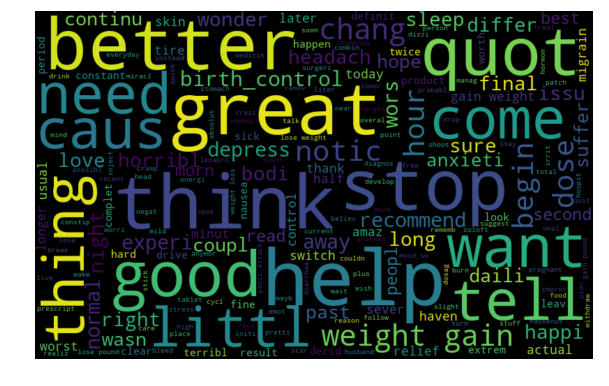

In [32]:
all_words = ' '.join([text for text in Reviews["review"]])
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

From the word cloud we can get a sense of what kind of words people use to describe their experiences using a drug, some of the following being horrible, good, best, wonder, suggest. We can also see some of the most common conditions that are present in the text - we now know that birth control, headaches, depression, and migrains, are just some of the conditions that hold in the text. It would be interesting to see later how the topic model can extract these terms and cluster them and their related words into a particular topic.

Note as well that the formation of bigrams here as helped in the word cloud. If we didn't create them, we would waste space listing two words seperately whereas they are frequently mentioned together. 

Now that we cleaned up the text, let's extract the sentiment scores using TextBlob that will let us get them pretty easily

In [33]:
from textblob import TextBlob
Reviews['sentiment'] = Reviews['review'].apply(lambda y: TextBlob(y).sentiment[0])
import datetime
Reviews['year'] = pd.DatetimeIndex(Reviews['date']).year
Reviews['month'] = pd.DatetimeIndex(Reviews['date']).month
Reviews['day'] = pd.DatetimeIndex(Reviews['date']).day

Reviews.head()

,drugName,condition,review,rating,date,usefulCount,word_count,sentiment,year,month,day
0,Mirtazapine,Depression,antidepress citalopram fluoxetin amitriptylin ...,10,28-Feb-12,22,68,-0.122222,2012,2,28
1,Mesalamine,"Crohn's Disease, Maintenance",crohn_diseas asacol complaint tablet happi res...,8,17-May-09,17,51,-0.300000,2009,5,17
2,Bactrim,Urinary Tract Infection,quick reduct,9,29-Sep-17,3,4,0.333333,2017,9,29
3,Contrave,Weight Loss,contrav combin alcohol smoke opioid cessat peo...,9,5-Mar-17,35,143,0.700000,2017,3,5
4,Cyclafem 1 / 35,Birth Control,birth_control cycl read type similar birth con...,9,22-Oct-15,4,149,0.262963,2015,10,22


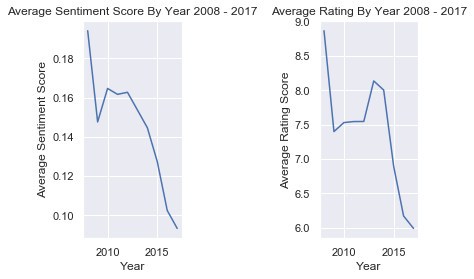

In [34]:
Sentiment_ByYear=pd.DataFrame(pysqldf("""SELECT year, AVG(sentiment) AS Average_Sentiment FROM Reviews GROUP BY year"""))
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.plot(Sentiment_ByYear.year, Sentiment_ByYear.Average_Sentiment)
plt.title('Average Sentiment Score By Year 2008 - 2017')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
Rating_ByYear=pd.DataFrame(pysqldf("""SELECT year, AVG(rating) AS Average_Rating FROM Reviews GROUP BY year"""))
plt.subplot(1,3,3)
plt.plot(Rating_ByYear.year,Rating_ByYear.Average_Rating)
plt.title('Average Rating By Year 2008 - 2017')
plt.xlabel('Year')
plt.ylabel('Average Rating Score')
plt.show()

Astonishingly, the sentiment scores are dropping year after year almost consistenly through the 9 year span. That comes as a surprise because one might think that drug advancements in recent years might be improving symptoms and conditions, but reviewer response is dropping. In addition, the sentiment scores and the actual rating given by the user show similar patterns over the years. 

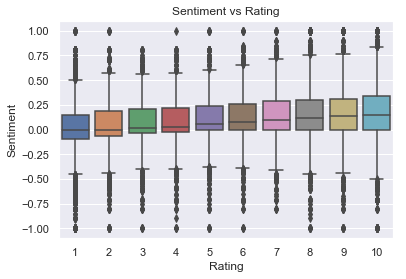

In [35]:
sns.boxplot(x=Reviews.rating,y=Reviews.sentiment)
plt.xlabel("Rating")
plt.ylabel("Sentiment")
plt.title("Sentiment vs Rating")
plt.show()

In [36]:
bigrams=[]
unigrams=[]
for doc in Reviews["review"]:
    for word in doc.split():
        if '_' in word:
            if word not in bigrams:
                bigrams.append(word)
        elif word not in unigrams:
            unigrams.append(word)

In [37]:
print("We have" + " " + str(len(unigrams)) + " " + "unique unigrams")
print("We have" + " " + str(len(bigrams)) + " " + "unique bigrams")
print("We have" + " " + str(len(bigrams)+len(unigrams))+ " " + "unique words total")

We have 19252 unique unigrams
We have 878 unique bigrams
We have 20130 unique words total


In [38]:
tokenized_Reviews=list(Reviews["review"].apply(lambda x: x.split()))
tokenized_Reviews[1]

['crohn_diseas',
 'asacol',
 'complaint',
 'tablet',
 'happi',
 'result',
 'reduc',
 'bout',
 'diarrhea',
 'drastic']

## (3) Topic Models

Topic modeling is a way to extract and summarize large quantities of text in order to extract insight of the main topics that textual information is about. What determines the topic of a given observation of text is the collection of words that is in the document. Algorithms that build topic models are able to extract key words that generalize each topic, and they also generally discover multiple topics within each document with relative proportions in each.

An example of the result of topic modeling can be understood as follows :

Consider having the following sentences that that describe drug reviews

-  I feel so sick and lightheaded after using this drug even for one day
-  The drug gave me a severe reaction and now I feel sick again
-  I am sleeping so much better now the drug really worked
-  My advice is taking this pill two hours before you sleep as it will go into effect later than you think
-  I was awake for 3 hours because of this drug it made me feel so sick I could not sleep

Topic modeling algorithms can give us results that would look like :

-  Sentence A and B are 100% Topic 1
-  Sentence C and D are 100% Topic 2
-  Sentence E is a mixture : 30% Topic 1 70% Topic 2

Basic steps for topic modeling consist of

-  Preprocessing the data
-  Training the model
-  Scoring it on a new document
-  Evaluate the performance


### 3.1 Bag of Words

Before we get into anything related to topic modeling algorithms, we need to discuss representing our text data in a different manner.

A Bag of words representation is a way to simplify the way we represent text. The most important thing to note is that a BOW model preserves the multiplicity of words, but neglects the grammar and word order as being important. For each document, we note the frequency of occurence of each word. 

Each unique word in the copus is given a specific ID. Looking at the BOW below and the actual text, we see that the word ID of '4' is present one time, the word ID of '81' is present twice, and the word ID of '83' is present three times. Again, we do not preserve the word order and if we randomly shuffle all the IDs and their counts, the representation is the same.

The result of a bag of words representation would actually be a sparse matrix, where much of the distinct words in the entire corpus are represented 0 times within a document. In our case the dictionary words that are not represented a least once are not inside the vector.

Using a bag of words model, we can compare document similarities and feed our data into a document classifier or use it for toipc modeling

There are some limitations of bag of words and other methods such as TF-IDF take into account the counts of each word and normalize the data.

In addition, since bag of words ignores the word order as being significiant, it would not be able to pick up meaningful expressions in text such as the follownig comparison

-  **this is fun**
-  **is this fun**

In [39]:
dictionary = gensim.corpora.Dictionary(tokenized_Reviews)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_Reviews]

In [40]:
print(bow_corpus[2000])
print(tokenized_Reviews[2000])
print(len(dictionary.token2id))

[(4, 1), (12, 1), (23, 1), (49, 1), (71, 1), (77, 1), (81, 2), (83, 3), (108, 1), (119, 1), (129, 1), (141, 1), (144, 1), (231, 2), (234, 1), (236, 1), (334, 1), (364, 1), (460, 1), (523, 1), (749, 1), (1150, 1), (1195, 2), (1527, 1), (1581, 1), (2066, 1), (3640, 1), (3713, 1), (4257, 1), (4347, 1), (5070, 1)]
['period', 'long', 'direct', 'ovari', 'heavi', 'bleed', 'period', 'diarrhea', 'period', 'panic_attack', 'anxieti', 'help', 'immedi', 'notic', 'nausea', 'nausea', 'away', 'notic', 'breast', 'achi', 'nippl', 'ting', 'super', 'weird', 'drive', 'definit', 'increas', 'posit', 'experi', 'panic_attack', 'calm', 'breasts_grown', 'mental', 'present', 'appetit', 'decreas']
20130


### 3.2 Latent Dirichlent Allocation (LDA)

Latent Dirichlent Allocation is a method that is commonly used for identifying topics for each document in a corpus. It is able to identify the topics present in a given document by analyzing the words in it and outputing a distribution of topics.

There are certain features LDA relies on to do its job. These are the features LDA uses to develop its topics

$ W $ :  Words appearing in a document

$ N : $  Words consist of N Words

$ M : $ Number of Documents

Some parameters are latent or inferred based on examining the corpus.

$ Z: $ Every word within each $ M_i $ in $ M $ is associated with a topic

$ \theta : $ topic distribution for document $ M_i $

We begin with a random assignment of words to topics that we assume live (exist) somewhere outside our massive corpus, and in the end result of LDA after a convergence has taken place with topics and their word assignments, we generate a certain number of topics and within each topic there are a collection of words that have certain probabilities to pertain to that topic. Each word with a probability can be though of as "importance". More relevant words pertianing to a topic are indicated by higher probabilities.

An example would be the following :

$ Topic 1 = P * word_1 + P * word_2 + P*word_3 +......P*word_n $

Where the top number of words associated with each particular topic can be adjusted by the user.

**It is important to note that every topic contains a probability for every word, even if it is very small! Some words may have a higher probability in *few* topics**

As we just noted, the model requires certain rules and specifications (or hyperparameters) that a user can tune. These are parameters from a **Dirichlent Distribution**.

$ \alpha $ : This parameter sets the prior on the per document topic distribution. Lower $ \alpha $ indicates that a document consists of a few or one topic, and higher alphas will recognize multiple topics within a document. 

$ \beta $ : This parameter sets the prior for the word distribution per document. A low value of $ \beta $ means that a topic can be classified by just a few words rather than many.

The most significant question is perhaps how we select the number of topics for LDA to output. That is a task that can be supported by domain knowledge, or a user may have to test out certain values and observe if topic identifications make sense. That is of course one downside to topic models in that the outcome may have ambiguity. 

The LDA model will create a topic distribution per document so that the most likely class of topic can be identified per document. This is a task worth discovering, but there are other important uses for topic identifications.

Each document with its distribution of topics (probability belonging to each topic) can be considered to be a unique document that is seperable from other documents but also similar enough to grouped up with other documents. From this, we can identify a group of reviews that are similar to a particular review.

Let's implement LDA

In [41]:
model_lda= gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=14, id2word=dictionary, passes=1)

In [42]:
topics_num=model_lda.print_topics(-1)
for idx, topic in topics_num:
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"generic" + 0.011*"nuvar" + 0.010*"plan" + 0.010*"cycl" + 0.009*"come" + 0.009*"hour" + 0.009*"drive" + 0.009*"normal" + 0.008*"better" + 0.008*"test"
Topic: 1 
Words: 0.032*"smoke" + 0.027*"quit" + 0.021*"chantix" + 0.011*"pack" + 0.011*"hair" + 0.011*"want" + 0.011*"stop" + 0.010*"cigarett" + 0.008*"septemb" + 0.008*"today"
Topic: 2 
Words: 0.070*"period" + 0.028*"birth_control" + 0.025*"gain" + 0.023*"weight" + 0.016*"cramp" + 0.014*"mood_sw" + 0.014*"bleed" + 0.013*"love" + 0.012*"spot" + 0.011*"pregnant"
Topic: 3 
Words: 0.053*"skin" + 0.032*"face" + 0.030*"clear" + 0.012*"cream" + 0.012*"product" + 0.012*"result" + 0.011*"look" + 0.009*"break" + 0.009*"better" + 0.009*"improv"
Topic: 4 
Words: 0.042*"dose" + 0.028*"blood_pressur" + 0.026*"high" + 0.019*"withdraw" + 0.016*"lower" + 0.014*"dosag" + 0.014*"increas" + 0.012*"addict" + 0.011*"heart" + 0.010*"suboxon"
Topic: 5 
Words: 0.054*"nausea" + 0.047*"stomach" + 0.028*"dizzi" + 0.027*"hour" + 0.025*"sick" 

We see that some of the topics can easily be identified to be regarding smoking, birth control, products applied to skin, blood pressure and circulations problems, weight loss and apetite, migraines/headaches, anxiety/depression, drinking fluids and so on. Note that again, the text cleaning process was very important because otherwise our readability of topics would be low and there would be too many of the same stopwords appearing across all topics. 

In [43]:
# Getting the Coherance score
from gensim.models import CoherenceModel
CohLda = CoherenceModel(model=model_lda, texts=tokenized_Reviews, dictionary=dictionary, coherence='c_v')
coherencelda = CohLda.get_coherence()
print ('\nCoherence Score is.... ', coherencelda)


Coherence Score is....  0.49461781480541633


Coherence score is one way to measure the readability of topics, and it was discovered previously that a topic number of 14 yielded the highest coherence score. It is good to examine the topics themselves however to see if they make sense or not and not solely rely on this measure. 

In [44]:
# Let's plot the visualization of topics
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_lda, bow_corpus, dictionary)
vis

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """
C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.208331  0.034089       1        1  14.495299
10     0.023761  0.136900       2        1  11.914815
12     0.062628 -0.066861       3        1  11.349153
7     -0.070317  0.054661       4        1   7.651781
9     -0.143855 -0.045810       5        1   6.681258
6     -0.045754  0.083049       6        1   6.672179
3      0.041685  0.005913       7        1   6.467477
13     0.154218  0.084367       8        1   6.169417
8      0.166801  0.042594       9        1   5.753879
5      0.039558 -0.214029      10        1   5.409780
11     0.036537 -0.210711      11        1   4.857543
4      0.125407  0.065268      12        1   4.619827
0     -0.116078  0.025425      13        1   4.493137
1     -0.066262  0.005145      14        1   3.464453, topic_info=     Category          Freq           Term         Total  loglift  logprob
term                                                                      
83    Default  13552.000000         period  13552.000000  30.0000  30.0000
232   Default   7677.000000           quot   7677.000000  29.0000  29.0000
18    Default   9598.000000         weight   9598.000000  28.0000  28.0000
4     Default   8447.000000        anxieti   8447.000000  27.0000  27.0000
14    Default   6314.000000           lose   6314.000000  26.0000  26.0000
196   Default   8059.000000          sleep   8059.000000  25.0000  25.0000
148   Default   4509.000000           skin   4509.000000  24.0000  24.0000
8     Default   7684.000000        depress   7684.000000  23.0000  23.0000
11    Default   6852.000000           gain   6852.000000  22.0000  22.0000
69    Default   6698.000000          cramp   6698.000000  21.0000  21.0000
81    Default   4360.000000         nausea   4360.000000  20.0000  20.0000
560   Default   3322.000000        migrain   3322.000000  19.0000  19.0000
124   Default   7368.000000          night   7368.000000  18.0000  18.0000
61    Default   3055.000000        stomach   3055.000000  17.0000  17.0000
523   Default   4654.000000          bleed   4654.000000  16.0000  16.0000
67    Default   5027.000000  birth_control   5027.000000  15.0000  15.0000
110   Default   3210.000000         insert   3210.000000  14.0000  14.0000
130   Default   6148.000000           dose   6148.000000  13.0000  13.0000
94    Default   2592.000000           face   2592.000000  12.0000  12.0000
506   Default   7837.000000           hour   7837.000000  11.0000  11.0000
57    Default   3049.000000          pound   3049.000000  10.0000  10.0000
482   Default   3064.000000          drink   3064.000000   9.0000   9.0000
218   Default   3339.000000          clear   3339.000000   8.0000   8.0000
73    Default   5236.000000        headach   5236.000000   7.0000   7.0000
576   Default   3449.000000           spot   3449.000000   6.0000   6.0000
650   Default   2372.000000           loss   2372.000000   5.0000   5.0000
294   Default   2154.000000          dizzi   2154.000000   4.0000   4.0000
739   Default   1523.000000  blood_pressur   1523.000000   3.0000   3.0000
593   Default   3024.000000           wake   3024.000000   2.0000   2.0000
60    Default   1292.000000          smoke   1292.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
1666  Topic14    112.797699           book    115.829498   3.3361  -5.8737
2437  Topic14    126.297440          boost    130.430359   3.3304  -5.7607
1720  Topic14    127.559189       thursday    131.831009   3.3297  -5.7507
1684  Topic14    103.039917          fruit    105.946808   3.3348  -5.9642
214   Topic14   1101.774780           quit   1389.965576   3.1303  -3.5946
996   Topic14    201.060791         monday    233.737213   3.2120  -5.2957
1278  Topic14    163.506271         sister    183.514648   3.2472  -5.5024
2340  Topic14    136.564316         pocket    152.652954   3.2512  -5.6825
2227  Topic14    1

**Note : if you are viewing this on github, unfortunately you will not be able to see the interactive visualization above**

This topic model interface gives us valuable insight into topics, their relative word probabilities, and topic similarities.

On the left side we see the 14 topics projected onto a 2D space. It is easy to see now which of the topics are more or less present across our documents. For example, we know that topic 1 which is regarding birth control and periods is the topic with the highest presence and this matches what our word cloud gave us. Furthermore, the distance between topics informs us that there is a connection between topics 10 and 11 - they may have similar contexts or be mentioned together.

On the right hand side, for a given topic we can investigate the words that lie within it. Using $\lambda = 1$ simply shows us the same output as the topic model from gensim - the *frequency* of the terms pertaining to that topic. But a value of $\lambda = 0$ essentially shows the distinctivness of words in topics. For example, in the topic about sleep disorders and insominia, the word abien has high exlclusivitiy within that topic and is virtually used nowhere else.

Taddy (2011) proposed in a paper of a intuitive measure of ranking terms within topics : lift. It is defined in our case with 14 topics (and using the word sneez as an example)

$$\frac{P(\text{sneeze in topic 3})}{P(\text{sneeze in topic 1}) + P(\text{sneeze in topic 2}) +  P(\text{sneeze in topic 4}) +.... P(\text{sneeze in topic 14}) } $$

Therefore, it is just the ratio of the term's probability pertaining to a topic over the marginal and if this ratio is quite high then we say this term has high exclusivity. If sneeze appears with high probability in topic 3 but extremely low in the other topics, we can say we have high *lift*

We can rank terms within topics via a formula and a tuning parameter $\lambda$ by 

$$r(w, k | \lambda) = {\lambda}{log(\theta_{kw})} + {(1 - \lambda)}{log(\frac{\theta_{kw}}{p_{w}}}) $$


If we set $ \lambda = 0 $ then essentially we are removing the first term and our ranking of topics is only based on lift.

It is worth noting that low values of lambda can actually lead to more interpretable topics due to great seperation distinction within the top terms, but extremely low values can often lead to low interpretability. A reader might want to choose $ \lambda $ near 0.5 for a balance




### 3.3 Mallet LDA

We will also run another form of LDA which is called Mallet, and gensim provides a wrapper to this in which we can implement. It is often said that the Mallet version gives higher coherance scores and better quality of topics so we will try it and compare it with the original LDA from gensim.

In [45]:
mallet_path =  '/Users/javacash/Downloads/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=14, id2word=dictionary)

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [46]:
topics_num=ldamallet.print_topics(-1)
for idx, topic in topics_num:
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.073*"good" + 0.069*"thing" + 0.068*"littl" + 0.048*"notic" + 0.038*"great" + 0.037*"differ" + 0.035*"normal" + 0.029*"pretti" + 0.029*"coupl" + 0.023*"haven"
Topic: 1 
Words: 0.068*"headach" + 0.054*"experi" + 0.047*"stop" + 0.044*"sever" + 0.043*"migrain" + 0.041*"extrem" + 0.031*"nausea" + 0.027*"dizzi" + 0.026*"begin" + 0.023*"caus"
Topic: 2 
Words: 0.028*"caus" + 0.025*"stop" + 0.021*"itch" + 0.020*"infect" + 0.019*"burn" + 0.018*"blood_pressur" + 0.017*"swell" + 0.017*"immedi" + 0.017*"wors" + 0.016*"develop"
Topic: 3 
Words: 0.105*"sleep" + 0.097*"night" + 0.068*"hour" + 0.042*"morn" + 0.039*"wake" + 0.032*"tire" + 0.025*"great" + 0.023*"couldn" + 0.020*"insomnia" + 0.017*"half"
Topic: 4 
Words: 0.097*"anxieti" + 0.090*"depress" + 0.019*"panic_attack" + 0.016*"zoloft" + 0.015*"lexapro" + 0.014*"disord" + 0.014*"mood" + 0.012*"person" + 0.012*"cymbalta" + 0.011*"anxious"
Topic: 5 
Words: 0.038*"read" + 0.028*"decid" + 0.025*"worst" + 0.025*"wasn" + 0.025*"stop" 

Here we do see that some of the words in the topics do differ and more importantly mallet LDA may have seperated some of the topics. For example blood pressure is located in a topic that seems to be exlusively about blood pressure and it is seperated from anothr topic that is about dosage. The original LDA had a more clear representation of a topic obviously being about smoking, but in Mallet's version we are less convicned that smoking discussions are homogenous in the topic it was placed in. 

In [47]:
# Getting the Coherance score
CohLda = CoherenceModel(model=ldamallet, texts=tokenized_Reviews, dictionary=dictionary, coherence='c_v')
coherencelda = CohLda.get_coherence()
print ('\nCoherence Score is.... ', coherencelda)


Coherence Score is....  0.5504268653673317


We do see that our overall coherance score is in fact higher for the mallet version, so we will continue with this version in our following work.

## (4) Machine Learning Models : Distribution of Topics

One way to represent drug review data is to represent the text by a distribution over topics. Essentially we have created a topic model, extracted the distribution of topics across our 14 built topics, and we are using this numerical representation as predictors in a machine learning model that maps to the rating of the drug. It will be interesting to see if this has any predictive power

In [48]:
ldamallet.fdoctopics()

'C:\\Users\\javacash\\AppData\\Local\\Temp\\3c3ea3_doctopics.txt'

In [50]:
topic_distsMallet=list(ldamallet.read_doctopics('C:\\Users\\javacash\\Appdata\\Local\\Temp\\3c3ea3_doctopics.txt', eps=0, renorm=True))

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [51]:
list_of_lists=[]
for thing in topic_distsMallet:
    for elem in thing:
        list_of_lists.append(list(elem))
#list_of_lists = [list(elem) for elem in topic_distsMallet[0]]
for list1 in list_of_lists:
    list1.reverse()
    list1.pop()
list_of_lists
from itertools import chain
list_of_lists=list(chain.from_iterable(list_of_lists))
list_of_lists
i=0
train_vecsMallet=[]
while i<len(list_of_lists):
  train_vecsMallet.append(list_of_lists[i:i+14])
  i+=14
train_vecsMallet[0:2]


[[0.08074534161490683,
  0.08074534161490683,
  0.051759834368530024,
  0.08074534161490683,
  0.15320910973084886,
  0.051759834368530024,
  0.051759834368530024,
  0.12422360248447205,
  0.051759834368530024,
  0.051759834368530024,
  0.06625258799171842,
  0.051759834368530024,
  0.051759834368530024,
  0.051759834368530024],
 [0.07619047619047618,
  0.05952380952380953,
  0.07619047619047618,
  0.05952380952380953,
  0.05952380952380953,
  0.05952380952380953,
  0.07619047619047618,
  0.05952380952380953,
  0.05952380952380953,
  0.07619047619047618,
  0.09285714285714285,
  0.09285714285714285,
  0.05952380952380953,
  0.09285714285714285]]

Now we have got the distribution of topics per document

In [52]:
class Topic_Modeling():
    def __init__(self, data, model, corpus, n, other_variable = None):
        self.data=data
        self.model=model
        self.corpus=corpus        
        self.n = n
        if other_variable is None:
            self.other_variable=[]
        else:
            self.other_variable=other_variable
    def distribution_list(self):        
        train_vecs = []
        for i in range(len(self.corpus)):
            top_topics = self.model.get_document_topics(self.corpus[i], minimum_probability=0)
            topic_vec = [top_topics[i][1] for i in range(self.n)]
            if self.other_variable:
                for variable in self.other_variable:
                    topic_vec.extend([self.data[str(variable)][i]]) # length review
            train_vecs.append(topic_vec)
        return train_vecs

Dist1 = Topic_Modeling(Reviews, model_lda, bow_corpus, 14)
train_vecs=Dist1.distribution_list()

In [53]:
train_vecs[0]

[0.0032476352,
 0.0032476278,
 0.0032476264,
 0.0032476229,
 0.0032476229,
 0.0032476184,
 0.14237279,
 0.31415582,
 0.18508816,
 0.0032476203,
 0.2462447,
 0.0032476184,
 0.08290992,
 0.0032476333]

Our class method handled the distribution of topics for the LDA model and one can compare for the first document how the distribution of topics is different. Thuogh the distribution of topics does differ numerically, you can see that just in this example both Mallet and gensim's LDA yield the 8th topic as the most prevalent topic within the the first document But we will go ahead and utilize Mallet's data since at least by the coherance score it gave better results.

In [54]:
X=pd.DataFrame(pd.concat([pd.Series([doc[i] for doc in train_vecsMallet]) for i in range(14)], axis=1))
topic_dists=X.rename(columns = lambda x : 'topic_' + str(x+1))
topic_dists.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,0.080745,0.080745,0.051760,0.080745,0.153209,0.051760,0.051760,0.124224,0.051760,0.051760,0.066253,0.051760,0.051760,0.051760
1,0.076190,0.059524,0.076190,0.059524,0.059524,0.059524,0.076190,0.059524,0.059524,0.076190,0.092857,0.092857,0.059524,0.092857
2,0.087912,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.087912,0.068681,0.068681,0.068681
3,0.075534,0.041051,0.075534,0.041051,0.052545,0.052545,0.041051,0.213465,0.121511,0.041051,0.052545,0.064039,0.041051,0.087028
4,0.082143,0.082143,0.044643,0.057143,0.057143,0.082143,0.044643,0.057143,0.044643,0.144643,0.057143,0.044643,0.157143,0.044643


In [55]:
#topic_dists.rename(columns={topic_dists.columns[14]: "word_length" },inplace=True)
topic_lists=[]
for i in list(range(1,15)):
    name='topic_' + str(i)
    topic_lists.append(name)
topic_lists
topic_dists['dominant_topic'] = topic_dists[topic_lists].idxmax(axis=1)
topic_dists.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,dominant_topic
0,0.080745,0.080745,0.051760,0.080745,0.153209,0.051760,0.051760,0.124224,0.051760,0.051760,0.066253,0.051760,0.051760,0.051760,topic_5
1,0.076190,0.059524,0.076190,0.059524,0.059524,0.059524,0.076190,0.059524,0.059524,0.076190,0.092857,0.092857,0.059524,0.092857,topic_11
2,0.087912,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.087912,0.068681,0.068681,0.068681,topic_1
3,0.075534,0.041051,0.075534,0.041051,0.052545,0.052545,0.041051,0.213465,0.121511,0.041051,0.052545,0.064039,0.041051,0.087028,topic_8
4,0.082143,0.082143,0.044643,0.057143,0.057143,0.082143,0.044643,0.057143,0.044643,0.144643,0.057143,0.044643,0.157143,0.044643,topic_13


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Dominant Topic')]

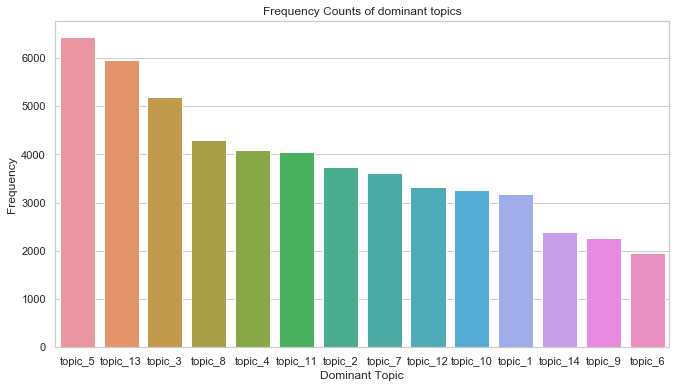

In [57]:
topic_data=pd.DataFrame(topic_dists.dominant_topic.value_counts().reset_index())
plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x="index", y="dominant_topic", data=topic_data)
ax.set_title("Frequency Counts of dominant topics")
ax.set(xlabel='Dominant Topic',ylabel='Frequency')

Our variable indicating the dominant topic tells us that topic 4 and 8 which are about depression / anxiety and pregnancy / birth control related conditions are most often the dominant topic that is discussed, respectively. This matches exactly what we had seen in our word cloud and the topic model visualization tool

In [58]:
Reviews_data= Reviews[['drugName','condition','review','rating','usefulCount','year']]
Reviews_data1=pd.merge(topic_dists, Reviews_data, left_index=True, right_index=True)
Reviews_data1.head(3)


,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_12,topic_13,topic_14,dominant_topic,drugName,condition,review,rating,usefulCount,year
0,0.080745,0.080745,0.051760,0.080745,0.153209,0.051760,0.051760,0.124224,0.051760,0.051760,...,0.051760,0.051760,0.051760,topic_5,Mirtazapine,Depression,antidepress citalopram fluoxetin amitriptylin ...,10,22,2012
1,0.076190,0.059524,0.076190,0.059524,0.059524,0.059524,0.076190,0.059524,0.059524,0.076190,...,0.092857,0.059524,0.092857,topic_11,Mesalamine,"Crohn's Disease, Maintenance",crohn_diseas asacol complaint tablet happi res...,8,17,2009
2,0.087912,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,...,0.068681,0.068681,0.068681,topic_1,Bactrim,Urinary Tract Infection,quick reduct,9,3,2017


In [59]:
Reviews_data1['dominant_topic'] = Reviews_data1['dominant_topic'].astype('category')

In [60]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
Results = pairwise_tukeyhsd(Reviews_data1['rating'], Reviews_data1['dominant_topic'])
df = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])
df=df[df.reject == True]
df.sort_values(by='meandiff', ascending=False)[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\libqsturng\qsturng_.py:755: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  scipy.stats.t.isf((1.+p)/2., (v,1e38)[v>1e38])


,group1,group2,meandiff,lower,upper,reject
75,topic_3,topic_9,1.9339,1.6611,2.2067,True
69,topic_2,topic_9,1.7023,1.4139,1.9908,True
24,topic_10,topic_9,1.6790,1.3826,1.9754,True
71,topic_3,topic_5,1.5378,1.3357,1.7399,True
16,topic_10,topic_14,1.4774,1.1853,1.7694,True


We see that out of the over 90 comparisons that we can make with dominant topics, the top 5 of them that have significant mean differences are in the table above.

In [61]:
model_data=Reviews_data1.drop(['dominant_topic', 'drugName', 'condition','review','usefulCount','year'], axis=1)
model_data['New_Rating'] = np.where(
     model_data['rating'].between(1,6, inclusive=True), 
    'BAD', 
     np.where(
        model_data['rating'].between(7,10, inclusive=True), 'GREAT','None'
     )
)
model_data.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,rating,New_Rating
0,0.080745,0.080745,0.051760,0.080745,0.153209,0.051760,0.051760,0.124224,0.051760,0.051760,0.066253,0.051760,0.051760,0.051760,10,GREAT
1,0.076190,0.059524,0.076190,0.059524,0.059524,0.059524,0.076190,0.059524,0.059524,0.076190,0.092857,0.092857,0.059524,0.092857,8,GREAT
2,0.087912,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.087912,0.068681,0.068681,0.068681,9,GREAT
3,0.075534,0.041051,0.075534,0.041051,0.052545,0.052545,0.041051,0.213465,0.121511,0.041051,0.052545,0.064039,0.041051,0.087028,9,GREAT
4,0.082143,0.082143,0.044643,0.057143,0.057143,0.082143,0.044643,0.057143,0.044643,0.144643,0.057143,0.044643,0.157143,0.044643,9,GREAT


In [62]:
model_data.drop('rating',axis=1,inplace=True)
model_data.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,New_Rating
0,0.080745,0.080745,0.051760,0.080745,0.153209,0.051760,0.051760,0.124224,0.051760,0.051760,0.066253,0.051760,0.051760,0.051760,GREAT
1,0.076190,0.059524,0.076190,0.059524,0.059524,0.059524,0.076190,0.059524,0.059524,0.076190,0.092857,0.092857,0.059524,0.092857,GREAT
2,0.087912,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.068681,0.087912,0.068681,0.068681,0.068681,GREAT
3,0.075534,0.041051,0.075534,0.041051,0.052545,0.052545,0.041051,0.213465,0.121511,0.041051,0.052545,0.064039,0.041051,0.087028,GREAT
4,0.082143,0.082143,0.044643,0.057143,0.057143,0.082143,0.044643,0.057143,0.044643,0.144643,0.057143,0.044643,0.157143,0.044643,GREAT


It is here that we realize that our dataset has imbalanced classes, where there are almost twice as many "Great" reviews as "BAD" reviews. We should correct for this seperation in class counts by randomly undersampling the majority class. Of course, as with other imbalanced class methods, by randomly undersampling we might lose information in the data,  but random undersampling has been shown to work pretty well in most cases.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV



In [64]:
bads = len(model_data[model_data['New_Rating'] == 'BAD'])
good_indices = model_data[model_data.New_Rating == 'GREAT'].index
random_indices = np.random.choice(good_indices,bads, replace=False)
bads_indices= model_data[model_data.New_Rating == 'BAD'].index
under_sample_indices = np.concatenate([bads_indices,random_indices])
under_sample = model_data.loc[under_sample_indices]
under_sample.New_Rating.value_counts()
from collections import Counter
print("Distribution of class labels before resampling {} " . format(Counter(model_data.New_Rating)))
print("Distribution of class labels after resampling {} " .format(Counter(under_sample.New_Rating)))

Distribution of class labels before resampling Counter({'GREAT': 35440, 'BAD': 18326}) 
Distribution of class labels after resampling Counter({'BAD': 18326, 'GREAT': 18326}) 


Now we have that our classes are even and we have undersampled our majority class to be equivalent to the minority class, we can build our machine learning model from this and see what how our results turn out.

In [65]:
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
X_train , X_test , y_train , y_test = train_test_split(under_sample.drop(['New_Rating'], axis = 1), under_sample[['New_Rating']] , test_size = 0.25, random_state=42)

f1_scores=[]
models = [['Softmax Regression',LogisticRegression(solver='newton-cg')],
           ['Random Forest', RandomForestClassifier()],
         ['SVM', SVC(kernel='linear')],
         ['Naive Bayes', GaussianNB()]]
for name,model in models:
    model = model
    if name=='Random Forest':
        max_features = ['auto', 'sqrt']
        n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
        random_grid={'max_features : ' : max_features, 'n_estimators :' : n_estimators}
        classifier=RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    classifier=model.fit(X_train, np.ravel(y_train, order='C'))
    predictions = classifier.predict(X_test)
    f1_scores.append(f1_score(y_test, predictions, average='weighted'))  
    print("Reports for model : " + " " + name)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

f1_scores

Reports for model :  Softmax Regression
              precision    recall  f1-score   support

         BAD       0.62      0.61      0.61      4538
       GREAT       0.62      0.63      0.62      4625

   micro avg       0.62      0.62      0.62      9163
   macro avg       0.62      0.62      0.62      9163
weighted avg       0.62      0.62      0.62      9163

[[2757 1781]
 [1720 2905]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Reports for model :  Random Forest
              precision    recall  f1-score   support

         BAD       0.58      0.66      0.62      4538
       GREAT       0.61      0.52      0.57      4625

   micro avg       0.59      0.59      0.59      9163
   macro avg       0.60      0.59      0.59      9163
weighted avg       0.60      0.59      0.59      9163

[[3014 1524]
 [2198 2427]]
Reports for model :  SVM
              precision    recall  f1-score   support

         BAD       0.62      0.61      0.61      4538
       GREAT       0.62      0.63      0.63      4625

   micro avg       0.62      0.62      0.62      9163
   macro avg       0.62      0.62      0.62      9163
weighted avg       0.62      0.62      0.62      9163

[[2755 1783]
 [1709 2916]]
Reports for model :  Naive Bayes
              precision    recall  f1-score   support

         BAD       0.57      0.72      0.64      4538
       GREAT       0.63      0.47      0.54      4625

   micro avg       0.59      0.59  

[0.617878800710364, 0.5918791837839404, 0.6188480118269764, 0.5879394481062556]

In [ ]:
df = pd.DataFrame({'F1_Scores': f1_scores, 'classifiers': ['Logistic Regression', 'Random Forest', 'SVM', 'NB']})
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
ax = sns.barplot(x="classifiers", y="F1_Scores", data=df)
ax.set_ylim([.30, .65])  
ax.set_title("Classifiers and their F1 Scores")
ax.set(xlabel='Classifier',ylabel='F1 Score')

## 4.1 Results 

Each of our classifiers was not able to achieve high accuracy as noted by the confusion matrix and the F1 scores, each of the models only performs marginally better than guessing in this binary classification setting. Logistic Regression, however, did perform best and we could tune hyperparameters in effort to get slightly better results. Morever, it is not surprising to see that Logistic Regression and SVM performed similarly in predictability because their intuition for classification is very related

The challenge here is that possibly for this dataset in particular, the distribution of topics are not good input features for machine learning models that predict the reviewer satisfaction. We may need to add better features that would make our model learn better connections between the predictors and target variable. Because the problem with topic modeling is about inferring the hidden structure of the text and it does not represent the text in a literal way, this could also contribute to the poor features.

But this does not mean we cannot improve. There are adjusted methods of LDA topic modeling that allow the user to specify seed words (or priors) for the topic model to converge into a certain direction. This is to say that we can specify that we want the words *joint* and *knee* to be one topic for itself. According to individuals that developed these methods, they say that when we have for example two topics that should be on their own but are frequently mentioned together or there are not enough documents about them, the topics will get mixed together.

The implementation we just described can be done through GuidedLDA, and there is documentation for it in the following link. It would take several iterations of finding topics that one expects to be comprised of in this corpus and setting seed words to get better quality topics, so we omit this process in the sake of time but one can refer to think link below to learn more.

https://github.com/vi3k6i5/GuidedLDA

We now turn our attention to a different problem : Text Classification. In this way, we will read in the text directly and vectorize our reviews so that we can use it to predict the rating. 

## (5) Text Classification

We will begin our discussion of text classification by introducing the Naive Bayes classifier and how it solve problems, which is one of the most accurate and useful classifiers in machine learning as well as NLP tasks.

Naive bayes falls under a probabilistic algorithm that utilizes Bayes Theorem and probability to assign a class to a given text. It is probabalisitc because if there are $ C $ classes $ C1 $ and $ C2 $ , the method will calculate the probability of the text pertaining to each class and then assign the class with the highest one.

Let's consider a toy example of a training set of 5 obervations

-  **Math is fun | MATH**
-  **Made him quit smoking | HEALTH**
-  **I lost apetitite | HEALTH**
-  **Chantix made him quit | HEALTH**
-  **math is like your soul | MATH**

And the following test observation

-  **Fun made me quit smoking soul | ? **

So we want to know which class the test observation belongs to and to do that we need to find

$$ P(\text{MATH} | \text{fun made me quit smoking soul}) $$
$$ P(\text{HEALTH} | \text{fun made me quit smoking soul}) $$

Given that bayes rules is

$$ P(A | B ) = \frac{P(B | A)P(A)}{P(B)}$$

We can now write

$$ P(\text{MATH} | \text{fun made me quit smoking soul}) = \frac{P(\text{fun made me quit smoking soul}|\text{MATH})*P(\text{MATH})}{P(\text{fun made me quit smoking soul})} $$

and

$$ P(\text{HEALTH} | \text{fun made me quit smoking soul}) = \frac{P(\text{fun made me quit smoking soul}|\text{HEALTH})*P(\text{HEALTH})}{P(\text{fun made me quit smoking soul})} $$

Note that we can ignore the denominator because we are only interested in *comparing* the posterior probabilities

Fortunately the naive assumption allows us to assume independence between words in a sentence so we can actually say that the numerator is

$$P(Fun | HEALTH) * P(made | HEALTH) * P(me | HEALTH) * P(quit | HEALTH) * P(smoking | HEALTH) * P(soul | HEALTH)$$

and we can say it similarly for the other class

In the following expression, since there will be times that a word does not appear within the text of a certain class, we apply **Laplace Smoothing** by adding 1 to each count and normalizing adding the number of vocabulary in the divisor.

So we get

$$ \frac{0 + 1}{11 +14} \times \frac{2+ 1}{11 +14} \times \frac{0+ 1}{11 +14} \times \frac{2+1}{11 +14} \times \frac{1+1}{11 +14} \times \frac{0+ 1}{11 +14} $$

and multiply that quantity by the prior which is $$ P (HEALTH) = \frac{3}{5} $$

All one would do next follow the same procedure for the MATH class and compare which of the posterior probabilities are greater and the given text is assigned to that class. This is the general idea of how this classifier works with text data and now we will do some coding and see what kind of results we get


As we did before, we once again randomly undersample the majority class so we have a balanced dataset

In [66]:
model_data1=pd.concat([Reviews.review, model_data.New_Rating],axis=1)
bads = len(model_data1[model_data1['New_Rating'] == 'BAD'])
good_indices = model_data1[model_data1.New_Rating == 'GREAT'].index
random_indices = np.random.choice(good_indices,bads, replace=False)
bads_indices= model_data1[model_data1.New_Rating == 'BAD'].index
under_sample_indices = np.concatenate([bads_indices,random_indices])
under_sample1 = model_data1.loc[under_sample_indices]
under_sample.New_Rating.value_counts()
print("Distribution of class labels before resampling {} " . format(Counter(model_data1.New_Rating)))
print("Distribution of class labels after resampling {} " .format(Counter(under_sample1.New_Rating)))

Distribution of class labels before resampling Counter({'GREAT': 35440, 'BAD': 18326}) 
Distribution of class labels after resampling Counter({'BAD': 18326, 'GREAT': 18326}) 


In [67]:
from sklearn.model_selection import train_test_split
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(under_sample1['review'],under_sample1['New_Rating'],random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#Train and evaluate the model
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<27489x15203 sparse matrix of type '<class 'numpy.int64'>'
	with 523015 stored elements in Compressed Sparse Row format>

Vectorizing our text gives us a sparse matrix which is 27489 x 15203. It is sparse because per document, much of the features (individual vocabularies) are not contained and so we have many zero values across our matrix. 

In [68]:
clfrNB = MultinomialNB(alpha = 8)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[3414 1099]
 [1151 3499]]
              precision    recall  f1-score   support

         BAD       0.75      0.76      0.75      4513
       GREAT       0.76      0.75      0.76      4650

   micro avg       0.75      0.75      0.75      9163
   macro avg       0.75      0.75      0.75      9163
weighted avg       0.75      0.75      0.75      9163



We have achieved higher precision, recall, and F1 Scores using this prediction method. We went from an F1 score of about .60 to .75 now, a very good baseline classifier.  

SVMs are aso another commonly used method to for document classification. We will implement LinearSVC() rather than SVC(kernel = 'linear') because the latter does not scale well with the number of training instances and may be too slow on large datasets. String kernels are also used in document classification, but we should always try with the linear kernel first with an effective grid search across C and the penalty. Although we have data now with a high number of features, we will set duality = False because we are still in the case that the number of features < number of training instances

In summary here are a few other ways we can implement an SVM classifier here

-  **SGDClassifier(loss="hinge", alpha=1/(m*C))**
-  **SVC(kernel="linear", C=1)**


In [71]:
from sklearn.svm import LinearSVC
C = [0.001, 0.01, 0.1, 1, 10]
penalty = ['l1','l2']
param_grid = {'C': C, 'penalty': penalty}
grid_search = GridSearchCV(LinearSVC(max_iter=10000, dual=False), param_grid, cv=3)
grid_search.fit(X_train_vectorized, y_train)
preds = grid_search.predict(vect.transform(X_test))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[3539  974]
 [1166 3484]]
              precision    recall  f1-score   support

         BAD       0.75      0.78      0.77      4513
       GREAT       0.78      0.75      0.77      4650

   micro avg       0.77      0.77      0.77      9163
   macro avg       0.77      0.77      0.77      9163
weighted avg       0.77      0.77      0.77      9163



It turns out that the SVC performed better for this classification task than Naive Bayes, with an F1 score of .77. Of course there are more ways to structure our text to increase predictive power further, but a linear SVM classifier nonetheless, is still performing well.

## Acknowledgements

Thank you to UCLA statistics professor Chen Miles for supervising me with this project and providing me with the input I needed to succeed

Also a big thanks to many members of stack-overflow who provided me first-hand help with either coding issues, importing modules, and understanding how to structure text data in a corpus

## References

Sievert, Carson, and Kenneth Shirley. "LDAvis: A method for visualizing and interpreting topics." *The Stanford Natural Language Processing Group*, 27 June 2014

Géron, Aurélien. *Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media, 2017.

Chollet, Francois. *Deep Learning with Python*. Manning Publications, 2017.

Jurafsky, Dan, and James H. Martin. *Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition*. 2nd ed., Prentice Hall, 2008.

Moore, Ajinkya. "Survey of resampling techniques for improving classification performance in unbalanced datasets." 22 Aug. 2016, https://arxiv.org/pdf/1608.06048.pdf.

"Topic Modeling with Gensim (Python)." *Machine Learning Plus*, 4 Dec. 2018, www.machinelearningplus.com/nlp/topic-modeling-gensim-python/.